In [19]:
from keras import applications
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense, Activation, Reshape, LeakyReLU
from keras.callbacks import CSVLogger
import tensorflow as tf
from scipy.ndimage import imread
import numpy as np
import random
from keras.layers import LSTM, GRU
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K
import keras
from keras.callbacks import CSVLogger, ModelCheckpoint
from keras.backend.tensorflow_backend import set_session
from keras import optimizers
import h5py
from sklearn.preprocessing import MinMaxScaler
import os
import pandas as pd
# import matplotlib
import h5py
import matplotlib.pyplot as plt
import json
import urllib2

In [20]:
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [21]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

In [22]:
url = 'https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1514561100&end=9999999999&period=300'
openUrl = urllib2.urlopen(url)
r = openUrl.read()
openUrl.close()
d = json.loads(r.decode())

In [23]:
df = pd.DataFrame(d)
original_columns=[u'close', u'date', u'high', u'low', u'open']
new_columns = ['Close','Timestamp','High','Low','Open']
df = df.loc[:,original_columns]
df.columns = new_columns
df.to_csv('data/test.csv',index=None)
df.head(100)

,Close,Timestamp,High,Low,Open
0,14300.000000,1514561100,14320.000000,14170.015912,14244.748167
1,14320.589161,1514561400,14380.494000,14258.000000,14300.000000
2,14405.676265,1514561700,14459.160000,14320.589161,14320.589161
3,14489.000000,1514562000,14489.000000,14360.000000,14430.242615
4,14500.000000,1514562300,14500.000000,14469.234730,14489.168781
5,14441.093396,1514562600,14526.800298,14410.000000,14500.000000
6,14484.211019,1514562900,14499.000001,14345.774573,14441.093396
7,14408.521121,1514563200,14499.000000,14260.000000,14441.982752
8,14430.000000,1514563500,14457.000000,14320.000000,14408.521121
9,14550.000000,1514563800,14550.000000,14405.000000,14430.000000


In [24]:
from PastSampler import *

In [25]:
dfp='data/test.csv'
columns = ['Close']
time_stamps = df['Timestamp']
df=pd.read_csv(dfp)
df = df.loc[:,columns]
original_df = pd.read_csv(dfp).loc[:,columns]

In [26]:
with h5py.File(''.join(['bitcoin2015to2017_close.h5']), 'r') as hf:
    original_datas = hf['original_datas'].value

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(original_datas[:,0].reshape(-1,1))
for c in columns:
    df[c] = scaler.transform(df[c].values.reshape(-1,1))

In [28]:
#%%Features are channels
A = np.array(df)[:,None,:]
original_A = np.array(original_df)[:,None,:]
time_stamps = np.array(time_stamps)[:,None,None]
#%%Make samples of temporal sequences of pricing data (channel)
NPS, NFS = 256, 16         #Number of past and future samples
ps = PastSampler(NPS, NFS, sliding_window=False)
datas, labels = ps.transform(A)
input_times, output_times = ps.transform(time_stamps)
original_inputs, original_outputs = ps.transform(original_A)

In [29]:
step_size = datas.shape[1]
batch_size= 8
nb_features = datas.shape[2]
epochs = 1
output_size=16
units= 50
second_units=30

In [30]:
model = Sequential()
model.add(GRU(units=units, activation=None, input_shape=(step_size,nb_features),return_sequences=False))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(output_size))
model.add(Activation('relu'))
model.load_weights('weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-32-0.00004.hdf5')
model.compile(loss='mse', optimizer='adam')

In [31]:
ground_true = np.append(original_inputs,original_outputs, axis=1)
ground_true.shape

(3, 272, 1)

In [32]:
ground_true_times = np.append(input_times,output_times, axis=1)
ground_true_times.shape

(3, 272, 1)

In [33]:
predicted = model.predict(datas)
predicted_inverted = []

# In[7]:
# we only care about the 0 axis, close price data

scaler.fit(original_datas[:,0].reshape(-1,1))
predicted_inverted.append(scaler.inverse_transform(predicted))
print np.array(predicted_inverted).shape
#get only the close data
ground_true = ground_true[:,:,0].reshape(-1)
ground_true_times = ground_true_times.reshape(-1)
ground_true_times = pd.to_datetime(ground_true_times, unit='s')
# since we are appending in the first dimension
predicted_inverted = np.array(predicted_inverted)[0,:,:].reshape(-1)
print np.array(predicted_inverted).shape
output_times = pd.to_datetime(output_times.reshape(-1), unit='s')

(1, 3, 16)
(48,)


In [34]:
ground_true_df = pd.DataFrame()
ground_true_df['times'] = ground_true_times
ground_true_df['value'] = ground_true
ground_true_df.set_index('times').reset_index()
ground_true_df.shape

(816, 2)

In [35]:
prediction_df = pd.DataFrame()
prediction_df['times'] = output_times
prediction_df['value'] = predicted_inverted
prediction_df.shape

(48, 2)

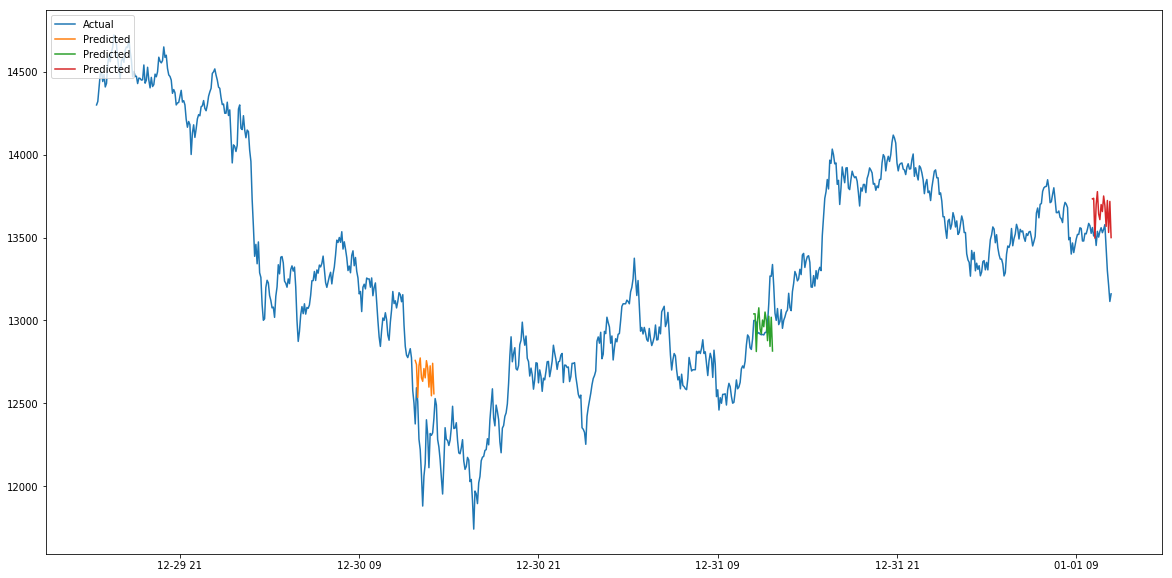

In [36]:
plt.figure(figsize=(20,10))
plt.plot(ground_true_df.times,ground_true_df.value, label = 'Actual')
# plt.plot(prediction_df.times,prediction_df.value, label = 'Predicted')
for i in range(len(output_times)/16):
    plt.plot(prediction_df.iloc[(i*16):(i+1)*16].times,prediction_df.value[(i*16):(i+1)*16], label='Predicted')
plt.legend(loc='upper left')
plt.savefig('result/test_gru.png')
plt.show()